# INTERPRETING LAPLACE TRANSFORMS IN CHEMICAL NETWORKS

This notebook demonstrates how Laplace transforms and transfer functions can be derived directly from a chemical model.

What we present is *not* a general technique. It only works if the underlying network can be represented by a system of linear differential equations. In practice this means that: (a) all reactions have a single reactant and (b) the kinetics are masss action.

We use the following notation:
* $s$: Laplace transform variable
* $G(s)$: Transfer function
* $S_n$: $n$-th chemical species
* $x_n (t), ~ x_n$: Concentration of $S_n$ at time $t$
* $\dot{x}_n (t), ~ \dot{x}_n$: First derivative of $x(t)$
* $X_n(s)$: Laplace Transform of the concentration of $S_n$

Reactions are described by arrows. The annotation above the arrow is the reaction rate. (Previously, we had assumed mass action kinetics and so just used the kinetic constants.) For example, $S_1$ is converted to $S_2$ at a rate $kx_1$ (where $x_1$ is the concentration of $S_1$ at time $t$) is denoted by $S_1 \xrightarrow{kx_1} S_2$.

# Preliminaries

In [1]:
#!pip install -q controlSBML
#!pip install -q control
import numpy as np
import control
import controlSBML as ctl
import matplotlib.pyplot as plt
import sympy
import tellurium as te

# Reference Models

The reference models are simple reaction networks that have particular Laplace Transforms. We use these to approximate more complex reaction networks.

## First Order System

### Reaction Network 1

Consider the one step sequential pathway with mass action kinetics
\begin{eqnarray}
S_1 & \xrightarrow{k_1 x_1} & S_2 \\
S_2 & \xrightarrow{k_2 x_2} & \emptyset \\
\end{eqnarray}

We want to control $s_2$ by manipulating $S_1$.
We will manipulate $s_1$ by controlling its concentration in solution.

The transfer function is $G_1(s) = \frac{X_2 (s)}{X_1 (s)} = \frac{k_1}{s + k_2}$

### Find the kinetic constants for the network whose transfer function is $G_1(s)$

By inspection
1. Change the transfer function so that $s$ has a coefficient of 1.
2. $k_1$ is the numerator.
3. $k_2$ is the denominator
4. Write the model.

A more generalizable approach
1. Let $p$ be the pole of the transfer function and $d$ be its dcgain.
2. $k_2 = -p$
3. $k_1 = - d p$

We can solve this system because there are two equations (1 pole, dcgain) and two unknowns.

## Second Order System

### Reaction network 2

\begin{eqnarray}
S_1 & \xrightarrow{k_1 x_1} & S_2 \\
S_2 & \xrightarrow{k_2 x_2} & S_3 \\
S_3 & \xrightarrow{k_3 x_3} & \emptyset \\
\end{eqnarray}

Find the transfer function
\begin{eqnarray}
G_2(s) 
 & = & \frac{k_1 k_2 }{(s + k_2)(s + k_3)} \\
 & = & \frac{k_1 k_2 }{s^2 + (k_2 + k_3)s + k_2 k_3} \\
 & = & \frac{k_1 k_2 }{s^2 + b s + c} \\
\end{eqnarray}

Clearly, the two poles are $p_1 = -k_2$, $p_2 = -k_3$.
So
* $k_2 = -p_1$
* $k_3 = - p_2$
* $k_1 = dk_3$

### Find the kinetic constants for the network whose transfer function is $G_2(s)$

Let $G_2 (s)$ has dcgain $d$ and poles $p_1, p_2$.

\begin{eqnarray}
d & = & \frac{k_1 k_2}{k_2 k_3} \\
& = & \frac{k_1}{k_2} \\
\end{eqnarray}

\begin{eqnarray}
b & = & - p_1 - p_2 \\
c & = & (-p_1)(- p_2) \\
\end{eqnarray}

Solving, we have
\begin{eqnarray}
c & = & (b + p_2)(- p_2) \\
p_2^2 + b p_2 + c & = & 0 \\
p_2 & = & \frac{1}{2} \left( -b \pm \sqrt{b^2 - 4c} \right) \\
p_1 & = & -b - p_2
\end{eqnarray}

**Question**
1. We know that this systems should have real poles $-k_2, -k_3$. This means the $b^2 \geq 4c$. Can we prove this?

\begin{eqnarray}
b^2 & = & (k_2 + k_3)^2 \\
4c & = & 4 k_2 k_3 \\
\end{eqnarray}

From this, we infer the following:
\begin{eqnarray}
b^2 - 4c & = & k_2^2 + 2k_2 k_3 + k_3^2 - 4 k_2 k_3 \\
& = & k_2^2 - 2 k_2 k_3 + k_3^2 \\
& = & (k_2 - k_3)^2 \\
& \geq & 0 \\
\end{eqnarray}

## Second Order System With a Zero

### Reaction Network 3

Consider the following model:
\begin{eqnarray}
S_1 & \xrightarrow{k_2 x_1} & S_2 \\
S_1 & \xrightarrow{k_3 x_1} & S_3 \\
S_2 & \xrightarrow{k^d_2 x_2} & \emptyset \\
S_3 & \xrightarrow{k^d_3 x_3} & \emptyset \\
\end{eqnarray}

### Transfer function

Find the transfer function $G_3(s) = \frac{X_3(s) + X_2 (s)}{X_1(s)}$.

Differential equations.
\begin{eqnarray}
\dot{x}_1 = -(k_2 + k_3) x_1 \\
\dot{x}_2 = k_2 x_1 - k^d_2 x_2 \\
\dot{x}_3 = k_3 x_1 - k^d_3 x_3 \\
\end{eqnarray}

Laplace transforms.
\begin{eqnarray}
s X_1(s) = -(k_2 + k_3) X_1 (s) \\
s X_2(s) = k_2 X_1 (s) - k^d_2 X_2 (s) \\
s X_3 (s) = k_3 X_1 (s) - k^d_3 X_3 (s) \\
\end{eqnarray}

Solve for the Transfer Function
\begin{eqnarray}
X_2(s) = \frac{k_2 X_1 (s)}{s + k^d_2} \\
X_3(s) = \frac{k_3 X_1 (s)}{s + k^d_3} \\
X_2(s) + X_3 (s) & = & X_1 (s) \left( \frac{k_2}{s + k^d_2} +  \frac{k_3}{s + k^d_3} \right) \\
& = & \frac{k_2 (s + k^d_3) + k_3 (s + k^d_2)}{(s + k^d_2)(s + k^d_3)} \\
& = & \frac{(k_2 + k_3) s + k_2 k^d_3 + k_3 k^d_2}{(s + k^d_2)(s + k^d_3)} \\
& = & (k_2 + k_3) \frac{ s + \frac{k_2 k^d_3 + k_3 k^d_2}{k_2 + k_3}}{(s + k^d_2)(s + k^d_3)} \\
& = & (k_2 + k_3) \frac{ s + \frac{k_2 k^d_3 + k_3 k^d_2}{k_2 + k_3}}{s^2 + (k^d_2 + k^d_3)s + k^d_2 k^d_3} \\
\end{eqnarray}

### Preliminary Questions

1. What are the poles?
2. What are the zeros?
3. What is the dcgain?
4. The unknown constants are $k_2, k_3, k^d_2, k^d_3$. But we only have 3 equations: dcgain, and 2 poles. How do we find all of the unknown constants?

### Find the kinetic constants for the network whose transfer function is $G_3(s)$

To find the poles, using the equations from the second order system without a zero. This will identify $k^d_2, k^d_3$.
Why does this work?

Finding $k_2, k_3$.

\begin{eqnarray}
d & = & \frac{k_2 k^d_3 + k_3 k^d_2}{k^d_2 k^d_3} \\
\end{eqnarray}

Using $k_3 > 0$ as a free parameter,

\begin{eqnarray}
k_2 & = & \frac{d k^d_2 k^d_3  - k_3 k^d_2}{k^d_3} \\
\end{eqnarray}


# Antimony for Reference Models

## Model 1

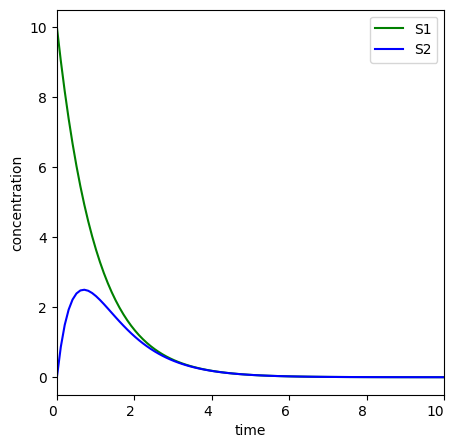

In [47]:
MODEL1 = """
model *main()
S1 -> S2; k1*S1
S2 -> ; k2*S2

S1 = 10
S2 = 0
k1 = 1
k2 = 2
end
"""
MODEL1_CTLSB = ctl.ControlSBML(MODEL1, input_name="S1", output_name="S2")
_ = MODEL1_CTLSB.plotModel()

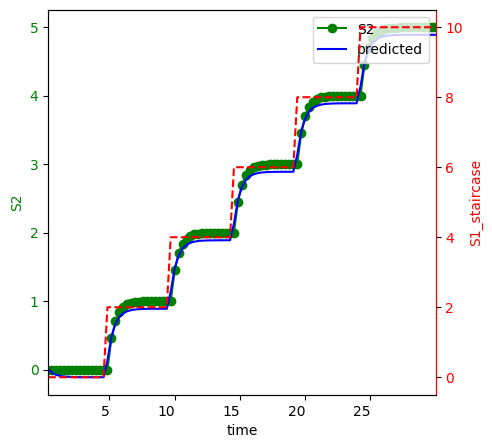

(0.5001320763992277, array([-1.99543594+0.j]))

In [48]:
_ = MODEL1_CTLSB.plotTransferFunctionFit(num_zero=0, num_pole=1, initial_value=0, final_value=10,
    times=np.linspace(0, 30, 100))
tf = MODEL1_CTLSB.getOpenLoopTransferFunction()
tf.dcgain(), tf.poles()

## Model 2

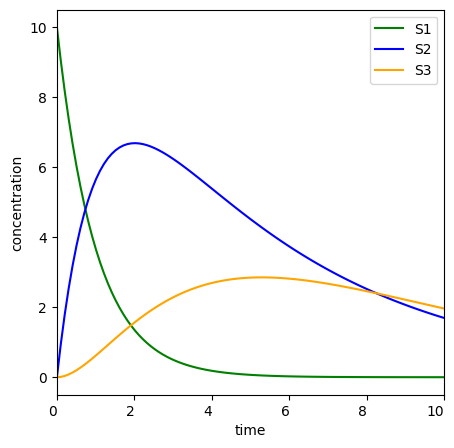

In [102]:
MODEL2 = """
model *main()
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k3*S3

S1 = 10
S2 = 0
k1 = 1
k2 = 0.2
k3 = 0.22
end
"""
MODEL2_CTLSB = ctl.ControlSBML(MODEL2, input_name="S1", output_name="S3")
_ = MODEL2_CTLSB.plotModel()

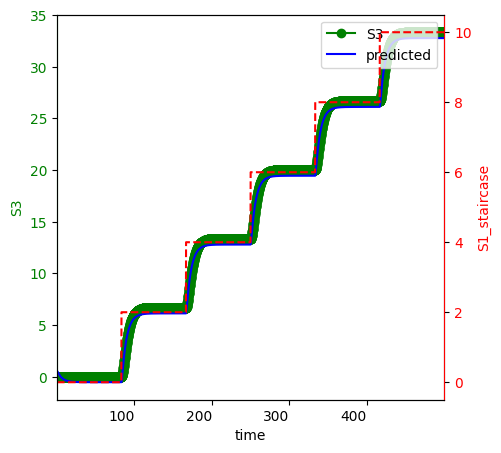

(3.331308216499541, array([-1.75581227+0.j, -0.16519886+0.j]))

In [108]:
_ = MODEL2_CTLSB.plotTransferFunctionFit(num_zero=0, num_pole=2, initial_value=0, final_value=10,
    num_step=5, times=np.linspace(0, 500, 5000), fit_start_time=0)
tf = MODEL2_CTLSB.getOpenLoopTransferFunction()
tf.dcgain(), tf.poles()

## Model 3

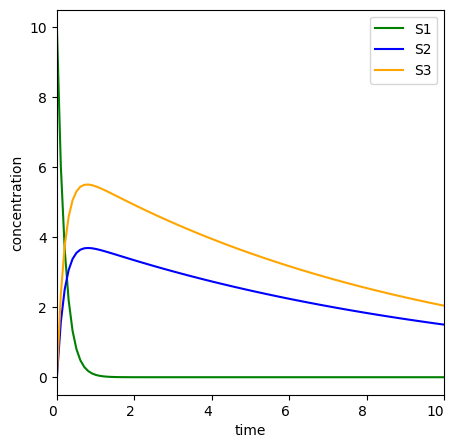

In [111]:
MODEL3 = """
model *main()
S1 -> S2; k2*S1
S1 -> S3; k3*S1
S2 -> ; k2d*S2
S3 -> ; k3d*S3

T := S2 + S3

S1 = 10
S2 = 0
k2 = 2
k3 = 3
k2d = 0.1
k3d = 0.11
end
"""
MODEL3_CTLSB = ctl.ControlSBML(MODEL3, input_name="S1", output_name="T")
_ = MODEL3_CTLSB.plotModel()

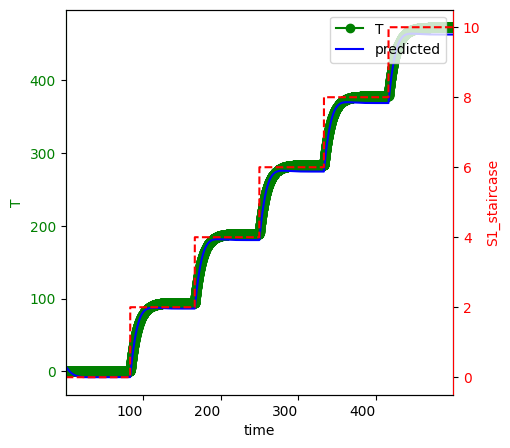

(47.06228731533342, array([-0.12346746+0.0729334j, -0.12346746-0.0729334j]))

In [115]:
_ = MODEL3_CTLSB.plotTransferFunctionFit(num_zero=1, num_pole=2, initial_value=0, final_value=10,
    times=np.linspace(0, 500, 10000))
tf = MODEL3_CTLSB.getOpenLoopTransferFunction()
tf.dcgain(), tf.poles()

# Helpers

In [2]:
class PlotResult(object):

    def __init__(self, times=None, yt=None, ax=None):
        self.times = times
        self.yt = yt
        self.ax = ax
        
    def __repr__(self):
        return ""

In [3]:
def plotTF(tf, times=None, is_plot=True, figsize=(5,5)):
    if times is None:
        times = np.linspace(0, 10, 100)
    _, yt = control.forced_response(tf, T=times, U=1)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        ax.plot(times, yt)
        ax.set_xlabel("time")
    else:
        ax = None
    return PlotResult(times=times, yt=yt, ax=ax)

# Tests
tf = control.TransferFunction([1], [1, 0])
plot_result = plotTF(tf, is_plot=False)
assert(isinstance(plot_result, PlotResult))
print("OK!")

OK!


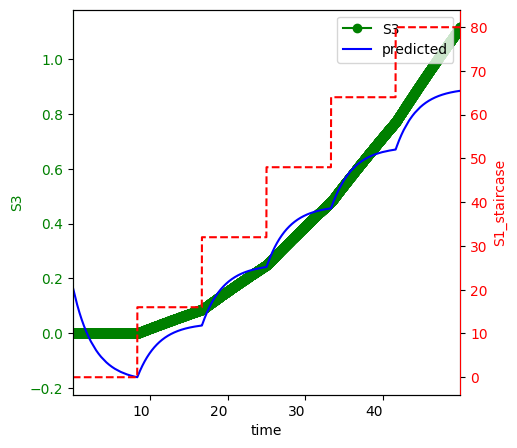

OK!


In [208]:
def plotModelStep(ctlsb:ctl.ControlSBML, **kwargs)->control.TransferFunction:
    """
    Plots the staircase step response for the model.

    Args:
        kwargs: dict
           options for ControlSBML.plotStaircaseResponse
           k* values for kinetic constants for model
    """
    ctlsb._roadrunner.reset()
    # Assign values to the kinetic constants
    exclude_keys = []
    antimony_strs = ctlsb._roadrunner.getAntimony().split('\n')
    for key in kwargs.keys():
        if (len(key) == 2) and (key[0] == "k"):
            antimony_strs.insert(-2, key + "=" + str(kwargs[key]))
            exclude_keys.append(key)                      
    antimony_str = "\n".join(antimony_strs)
    new_ctlsb = ctl.ControlSBML(antimony_str, input_name=ctlsb.input_name, output_name=ctlsb.output_name)
    # Do the fit
    new_kwargs = {k: v for k,v in kwargs.items() if not k in exclude_keys}
    _ = new_ctlsb.plotTransferFunctionFit(**new_kwargs)
    return new_ctlsb.getOpenLoopTransferFunction()

# Tests

k3 = 20.655
k2 = 0.0142
k1 =  0.073272
tf = plotModelStep(MODEL2_CTLSB, k1=1, k2=k2, k3=k3, num_zero=0, num_pole=2,
    initial_value=0, final_value=80, times=np.linspace(0, 50, 5000),
    #ylim=[196, 198],
    #fit_start_time=100
                  )
assert(isinstance(tf, control.TransferFunction))
print("OK!")

In [168]:
tf

TransferFunction(array([9242.52210908]), array([8860.64433685, 9840.99872876, 5000.32309059]))

In [170]:
new_tf = control.TransferFunction([9243/8861], [1, 9841/8861, 5000/8861])
new_tf

TransferFunction(array([1.04311026]), array([1.       , 1.110597 , 0.5642704]))

In [173]:
tf.poles()

array([-0.55532072+0.50591344j, -0.55532072-0.50591344j])

# Approximate Chemical Reaction Networks

**Problem addressed.** We are given a complex chemical reaction network. We do system identification and find that its transfer function has one of the following forms: first order, second order, second order with a zero. Construct a network that approximates the original complex chemical reactio network.

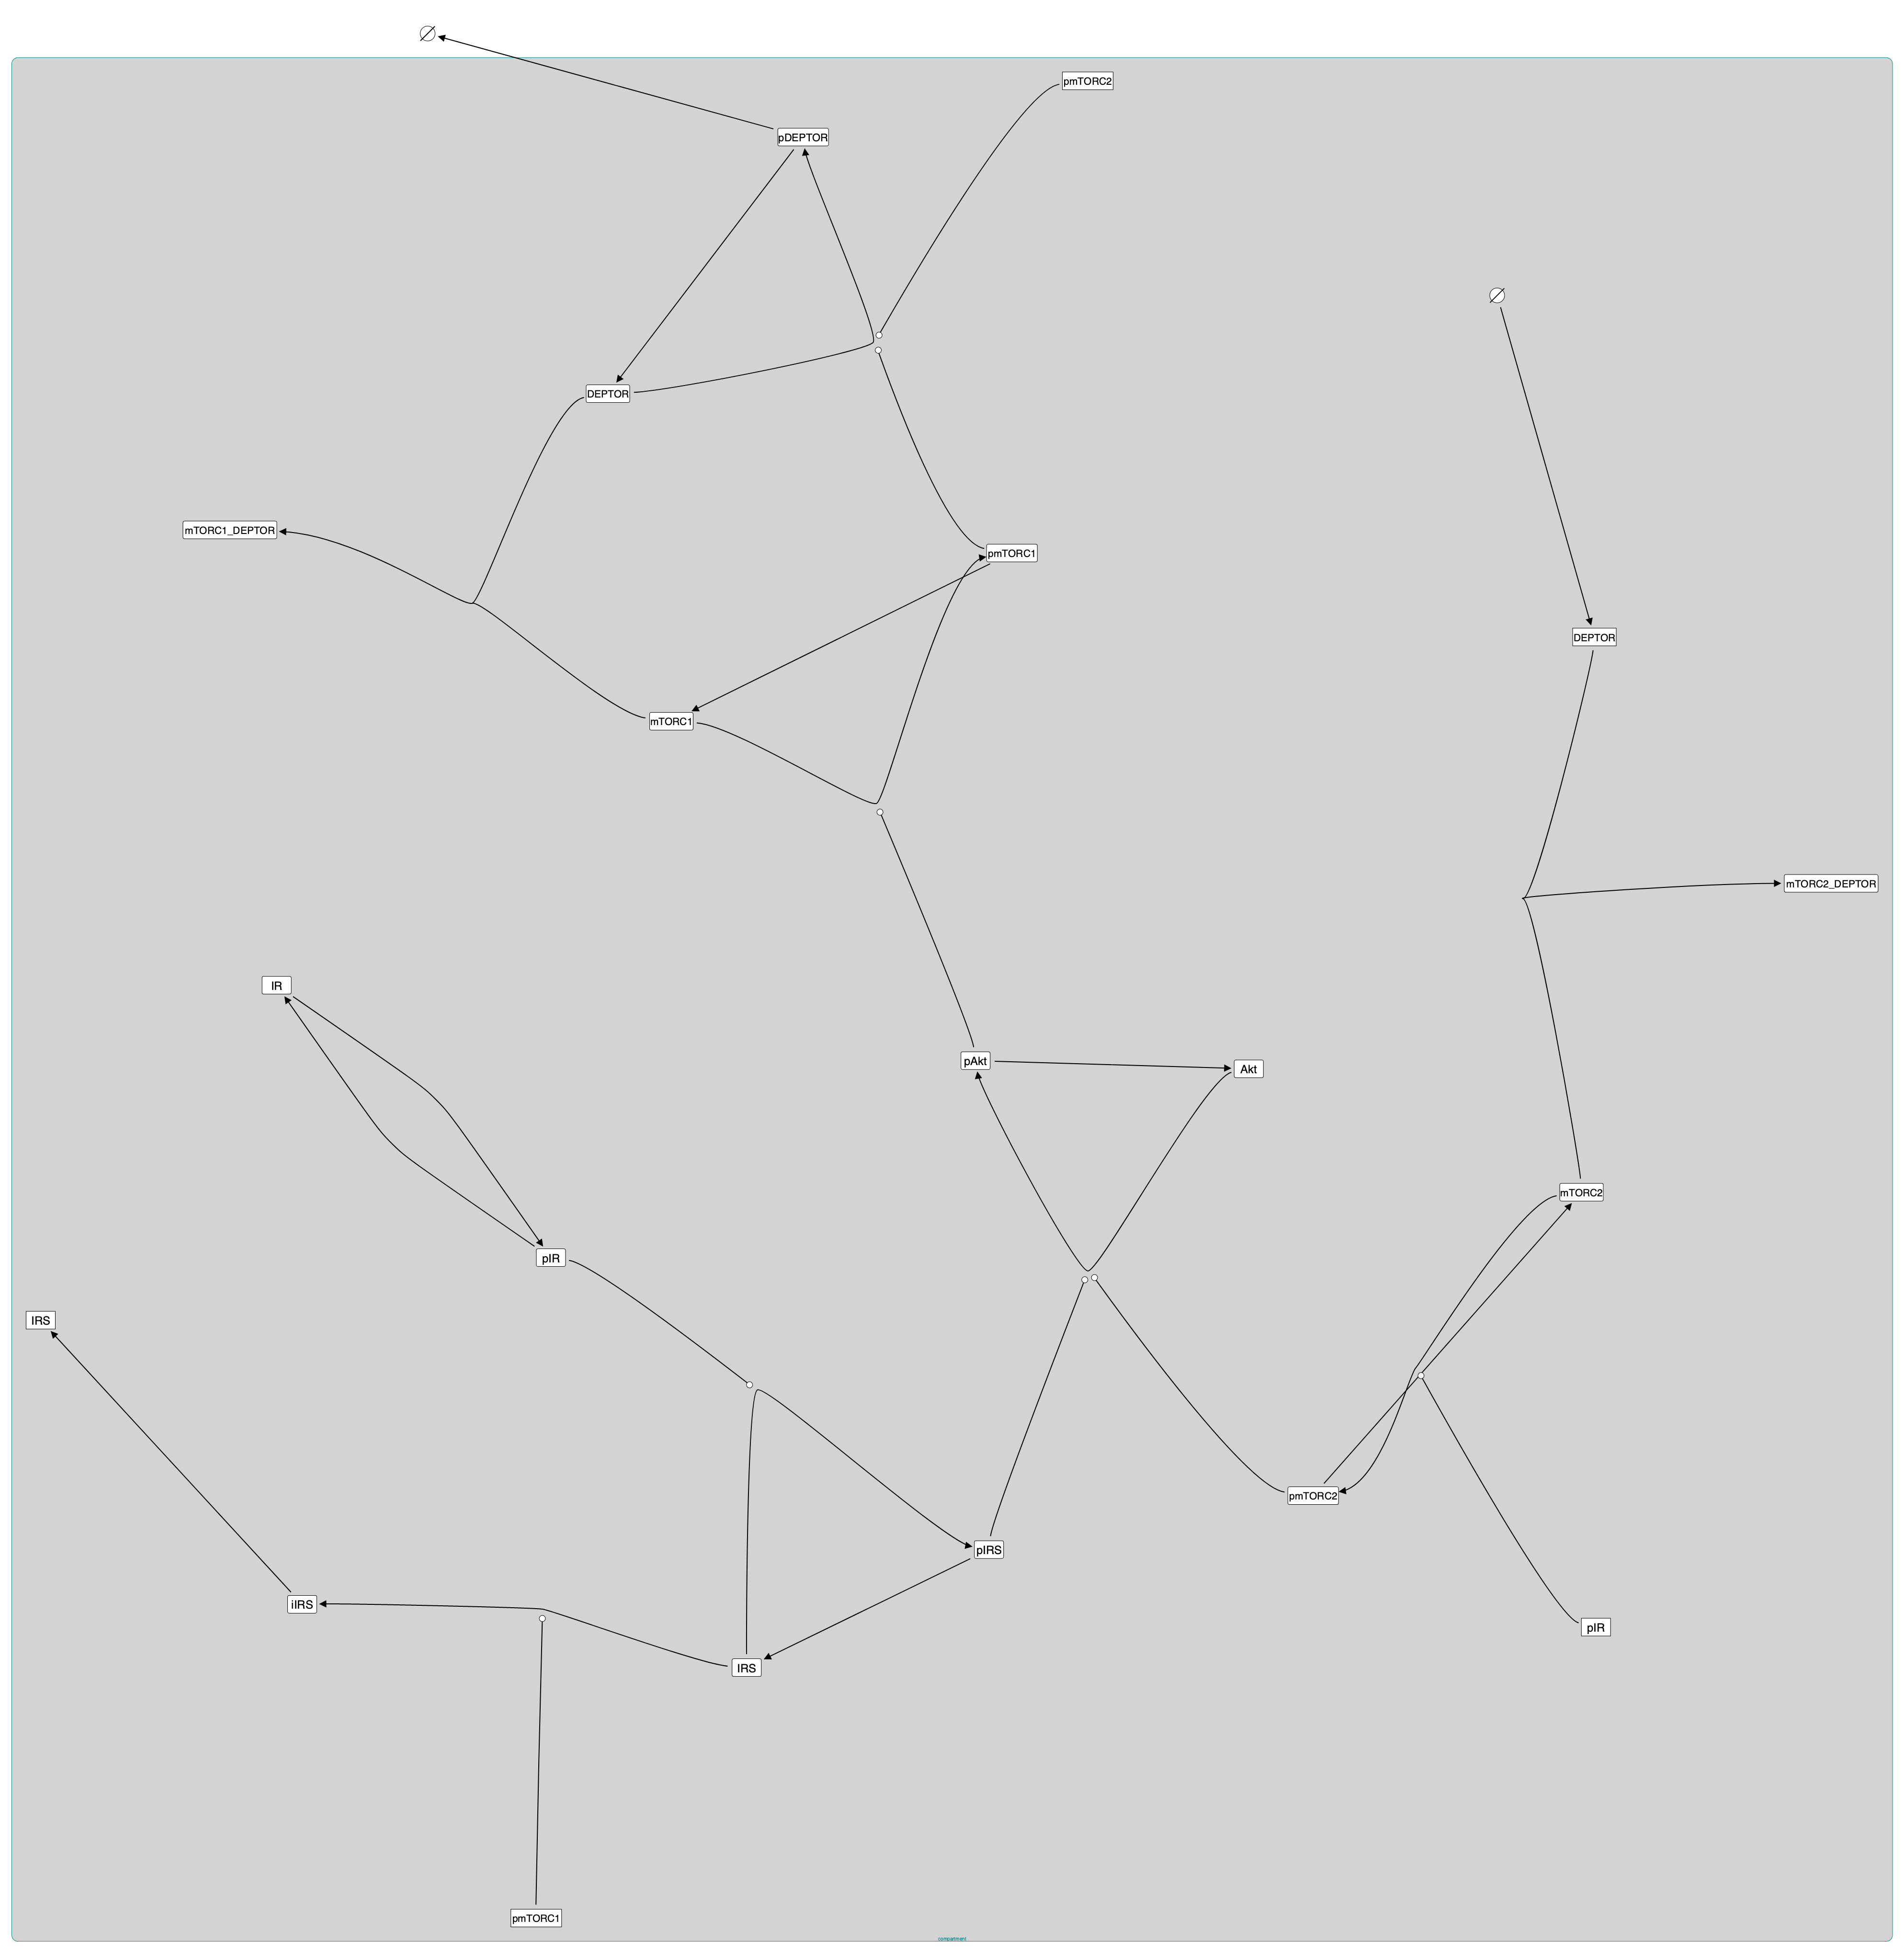

In [126]:
MTOR_URL = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml"
rr = te.loadSBMLModel(MTOR_URL)
MTOR_MODEL = rr.getAntimony()
MTOR_CTLSB = ctl.ControlSBML(MTOR_MODEL, input_name="DEPTOR", output_name="mTORC2_DEPTOR")
draw = MTOR_CTLSB.draw()
#print(MTOR_MODEL)

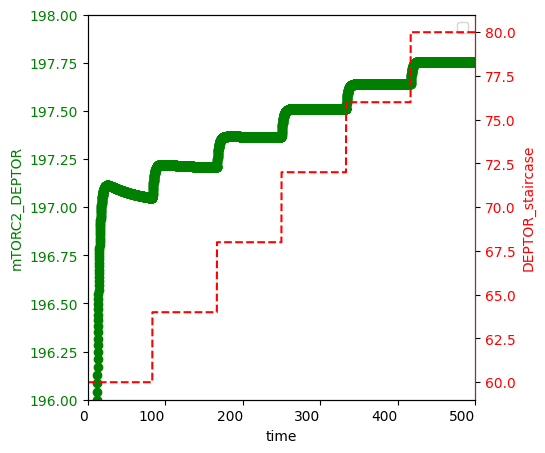

In [143]:
_ = MTOR_CTLSB.plotStaircaseResponse(initial_value=60, final_value=80,
    times=np.linspace(0, 500, 5000), ylim=[196, 198])

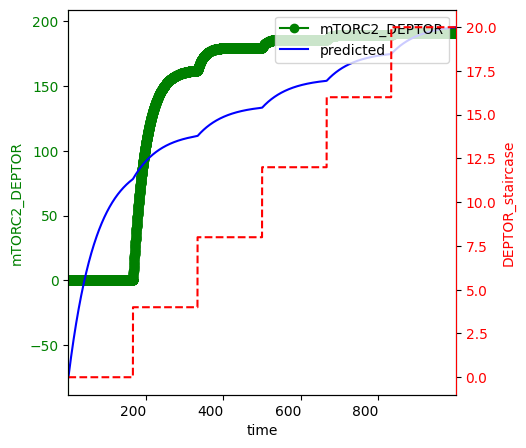

(5.167633768164094, array([-2.06533577e+01+0.j, -1.41687553e-02+0.j]))

In [206]:
_ = MTOR_CTLSB.plotTransferFunctionFit(num_zero=0, num_pole=2,
    initial_value=0, final_value=20,
    times=np.linspace(0, 1000, 10000), 
    fit_start_time=0)
tf = MTOR_CTLSB.getOpenLoopTransferFunction()
tf.dcgain(), tf.poles()

In [196]:
tf

TransferFunction(array([8.74413994]), array([  5.78233176, 119.50649473,   1.69209745]))

In [198]:
MTOR_TF = control.TransferFunction([8.744/5.782], [1, 119.5/5.782, 1.692/5.782])
MTOR_TF

TransferFunction(array([1.51227949]), array([ 1.        , 20.66758907,  0.29263231]))

In [199]:
MTOR_TF.dcgain(), MTOR_TF.poles()

(5.167848699763593, array([-2.06534204e+01+0.j, -1.41687092e-02+0.j]))

## Calculating approximate network

Let $G_2 (s)$ has dcgain $d$ and poles $p_1, p_2$.

\begin{eqnarray}
d & = & \frac{k_1 k_2}{k_2 k_3} \\
& = & \frac{k_1}{k_2} \\
\end{eqnarray}

\begin{eqnarray}
b & = & - p_1 - p_2 \\
c & = & (-p_1)(- p_2) \\
\end{eqnarray}

Solving, we have
\begin{eqnarray}
c & = & (b + p_2)(- p_2) \\
p_2^2 + b p_2 + c & = & 0 \\
p_2 & = & \frac{1}{2} \left( -b \pm \sqrt{b^2 - 4c} \right) \\
p_1 & = & - b - p_2
\end{eqnarray}

In [200]:
b = 20.67; c = 0.2926; d = MTOR_TF.dcgain()
b, c, d

(20.67, 0.2926, 5.167848699763593)

In [201]:
p2 = 0.5*(-b + np.sqrt(b**2 - 4*c))
p1 = -b - p2
p1, p2

(-20.655834510832932, -0.014165489167069722)

In [202]:
approx_tf = control.TransferFunction([1], [1, -(p1 + p2), p1*p2])
approx_tf

TransferFunction(array([1]), array([ 1.    , 20.67  ,  0.2926]))

Constructing the network
* $k_2 = -p_1$
* $k_3 = - p_2$
* $k_1 = dk_3$

In [207]:
d = 5.16
k2 =  0.0142
k3 = 20.655
k1 = d*k2
k1, k2, k3

(0.073272, 0.0142, 20.655)

# NOTES

1. Explore effect of network depth and branching.
  1. What is transfer function
  2. What is response
  3. Effect of a dominante pole in a path
1. Consider comparison of he 3 models.
  1. When do they look the same?
  2. When they differ, how?
  3. Build computational framework to analyze